In [17]:
import pysam
from pysam import VariantFile as vcf
import operator
from math import log2
import pandas as pd
from pandas import DataFrame as dataframe
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
import scipy
import  os
import os.path
import matplotlib.colors as mcolors
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [18]:
def getmaxindices(allp,num):

    max_values_and_indices = sorted(enumerate(allp), key=lambda x: x[1])[:num]

    max_indices = [index for index, value in max_values_and_indices]
    return max_indices

In [19]:

regions={'posmhc':[29720403, 30048796],
'posmhc':[30994370, 31528792],
'posmhc':[32212726, 32882258]}

In [20]:
#mhc1
less_95_xs=[]
less_95_ys=[]
from_95_to_99_xs=[]
from_95_to_99_ys=[]
from_99_to_999_xs=[]
from_99_to_999_ys=[]
larger_than_999_xs=[]
larger_than_999_ys=[]
#mhc2
less_95_xs_mhc2=[]
less_95_ys_mhc2=[]
from_95_to_99_xs_mhc2=[]
from_95_to_99_ys_mhc2=[]
from_99_to_999_xs_mhc2=[]
from_99_to_999_ys_mhc2=[]
larger_than_999_xs_mhc2=[]
larger_than_999_ys_mhc2=[]
#mhc3
less_95_xs_mhc3=[]
less_95_ys_mhc3=[]
from_95_to_99_xs_mhc3=[]
from_95_to_99_ys_mhc3=[]
from_99_to_999_xs_mhc3=[]
from_99_to_999_ys_mhc3=[]
larger_than_999_xs_mhc3=[]
larger_than_999_ys_mhc3=[]

In [21]:
#posmhc1
#[29720403, 30048796]
df_mhc_pos_path=pd.read_csv("../../similar_region_csvfiles/posmhc.csv")
positions1=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=29720403)&(df_mhc_pos_path["Unnamed: 0"]<=30048796)]["Unnamed: 0"].to_list()
Ps1=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=29720403)&(df_mhc_pos_path["Unnamed: 0"]<=30048796)]["P"].to_list()
midpvalue=[]
mean_arr=-0.017462454026226405
std_arr=0.006996042091888453
for prob in Ps1:
    mid_res=stats.norm.cdf(prob, mean_arr, std_arr)
    midpvalue.append(mid_res)
pvalue = multipletests(midpvalue, method='fdr_bh')[1]
for i in range(len(pvalue)):
    
    if pvalue[i]>=0.05:
        # arr_less_than_95.append(i)
        less_95_xs.append(positions1[i])
        less_95_ys.append(Ps1[i])
    elif pvalue[i]<0.05 and pvalue[i]>=0.01: 
        from_95_to_99_xs.append(positions1[i])
        from_95_to_99_ys.append(Ps1[i])
    elif pvalue[i]<0.01 and pvalue[i]>=0.001: #大于等于0.0001小于0.01
        #arr_99_to_999.append(i)
        from_99_to_999_xs.append(positions1[i])
        from_99_to_999_ys.append(Ps1[i])
    elif pvalue[i]<0.001:  #<0.0001
        #arr_larger_than_999.append(i)
        larger_than_999_xs.append(positions1[i])
        larger_than_999_ys.append(Ps1[i])
    else:
        print("not in this range")

In [22]:
#posmhc2
#[30994370, 31528792]
df_mhc_pos_path=pd.read_csv("../../similar_region_csvfiles/posmhc.csv")
positions2=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=30994370)&(df_mhc_pos_path["Unnamed: 0"]<=31528792)]["Unnamed: 0"].to_list()
Ps2=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=30994370)&(df_mhc_pos_path["Unnamed: 0"]<=31528792)]["P"].to_list()
midpvalue=[]
mean_arr=-0.017462454026226405
std_arr=0.006996042091888453
for prob in Ps2:
    mid_res=stats.norm.cdf(prob, mean_arr, std_arr)
    midpvalue.append(mid_res)
pvalue = multipletests(midpvalue, method='fdr_bh')[1]
for i in range(len(pvalue)):
    
    if pvalue[i]>=0.05:
        # arr_less_than_95.append(i)
        less_95_xs_mhc2.append(positions2[i])
        less_95_ys_mhc2.append(Ps2[i])
    elif pvalue[i]<0.05 and pvalue[i]>=0.01:
        from_95_to_99_xs_mhc2.append(positions2[i])
        from_95_to_99_ys_mhc2.append(Ps2[i])
    elif pvalue[i]<0.01 and pvalue[i]>=0.001:
        #arr_99_to_999.append(i)
        from_99_to_999_xs_mhc2.append(positions2[i])
        from_99_to_999_ys_mhc2.append(Ps2[i])
    elif pvalue[i]<0.001:
        #arr_larger_than_999.append(i)
        larger_than_999_xs_mhc2.append(positions2[i])
        larger_than_999_ys_mhc2.append(Ps2[i])
    else:
        print("not in this range")

In [23]:
#posmhc3
#[32212726, 32882258]
df_mhc_pos_path=pd.read_csv("../../similar_region_csvfiles/posmhc.csv")
positions3=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=32212726)&(df_mhc_pos_path["Unnamed: 0"]<=32882258)]["Unnamed: 0"].to_list()
Ps3=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=32212726)&(df_mhc_pos_path["Unnamed: 0"]<=32882258)]["P"].to_list()
midpvalue=[]
mean_arr=-0.017462454026226405
std_arr=0.006996042091888453
for prob in Ps3:
    mid_res=stats.norm.cdf(prob, mean_arr, std_arr)
    midpvalue.append(mid_res)
pvalue = multipletests(midpvalue, method='fdr_bh')[1]
for i in range(len(pvalue)):
    
    if pvalue[i]>=0.05:
        # arr_less_than_95.append(i)
        less_95_xs_mhc3.append(positions3[i])
        less_95_ys_mhc3.append(Ps3[i])
    elif pvalue[i]<0.05 and pvalue[i]>=0.01:
        from_95_to_99_xs_mhc3.append(positions3[i])
        from_95_to_99_ys_mhc3.append(Ps3[i])
    elif pvalue[i]<0.01 and pvalue[i]>=0.001:
        #arr_99_to_999.append(i)
        from_99_to_999_xs_mhc3.append(positions3[i])
        from_99_to_999_ys_mhc3.append(Ps3[i])
    elif pvalue[i]<0.001:
        #arr_larger_than_999.append(i)
        larger_than_999_xs_mhc3.append(positions3[i])
        larger_than_999_ys_mhc3.append(Ps3[i])
    else:
        print("not in this range")

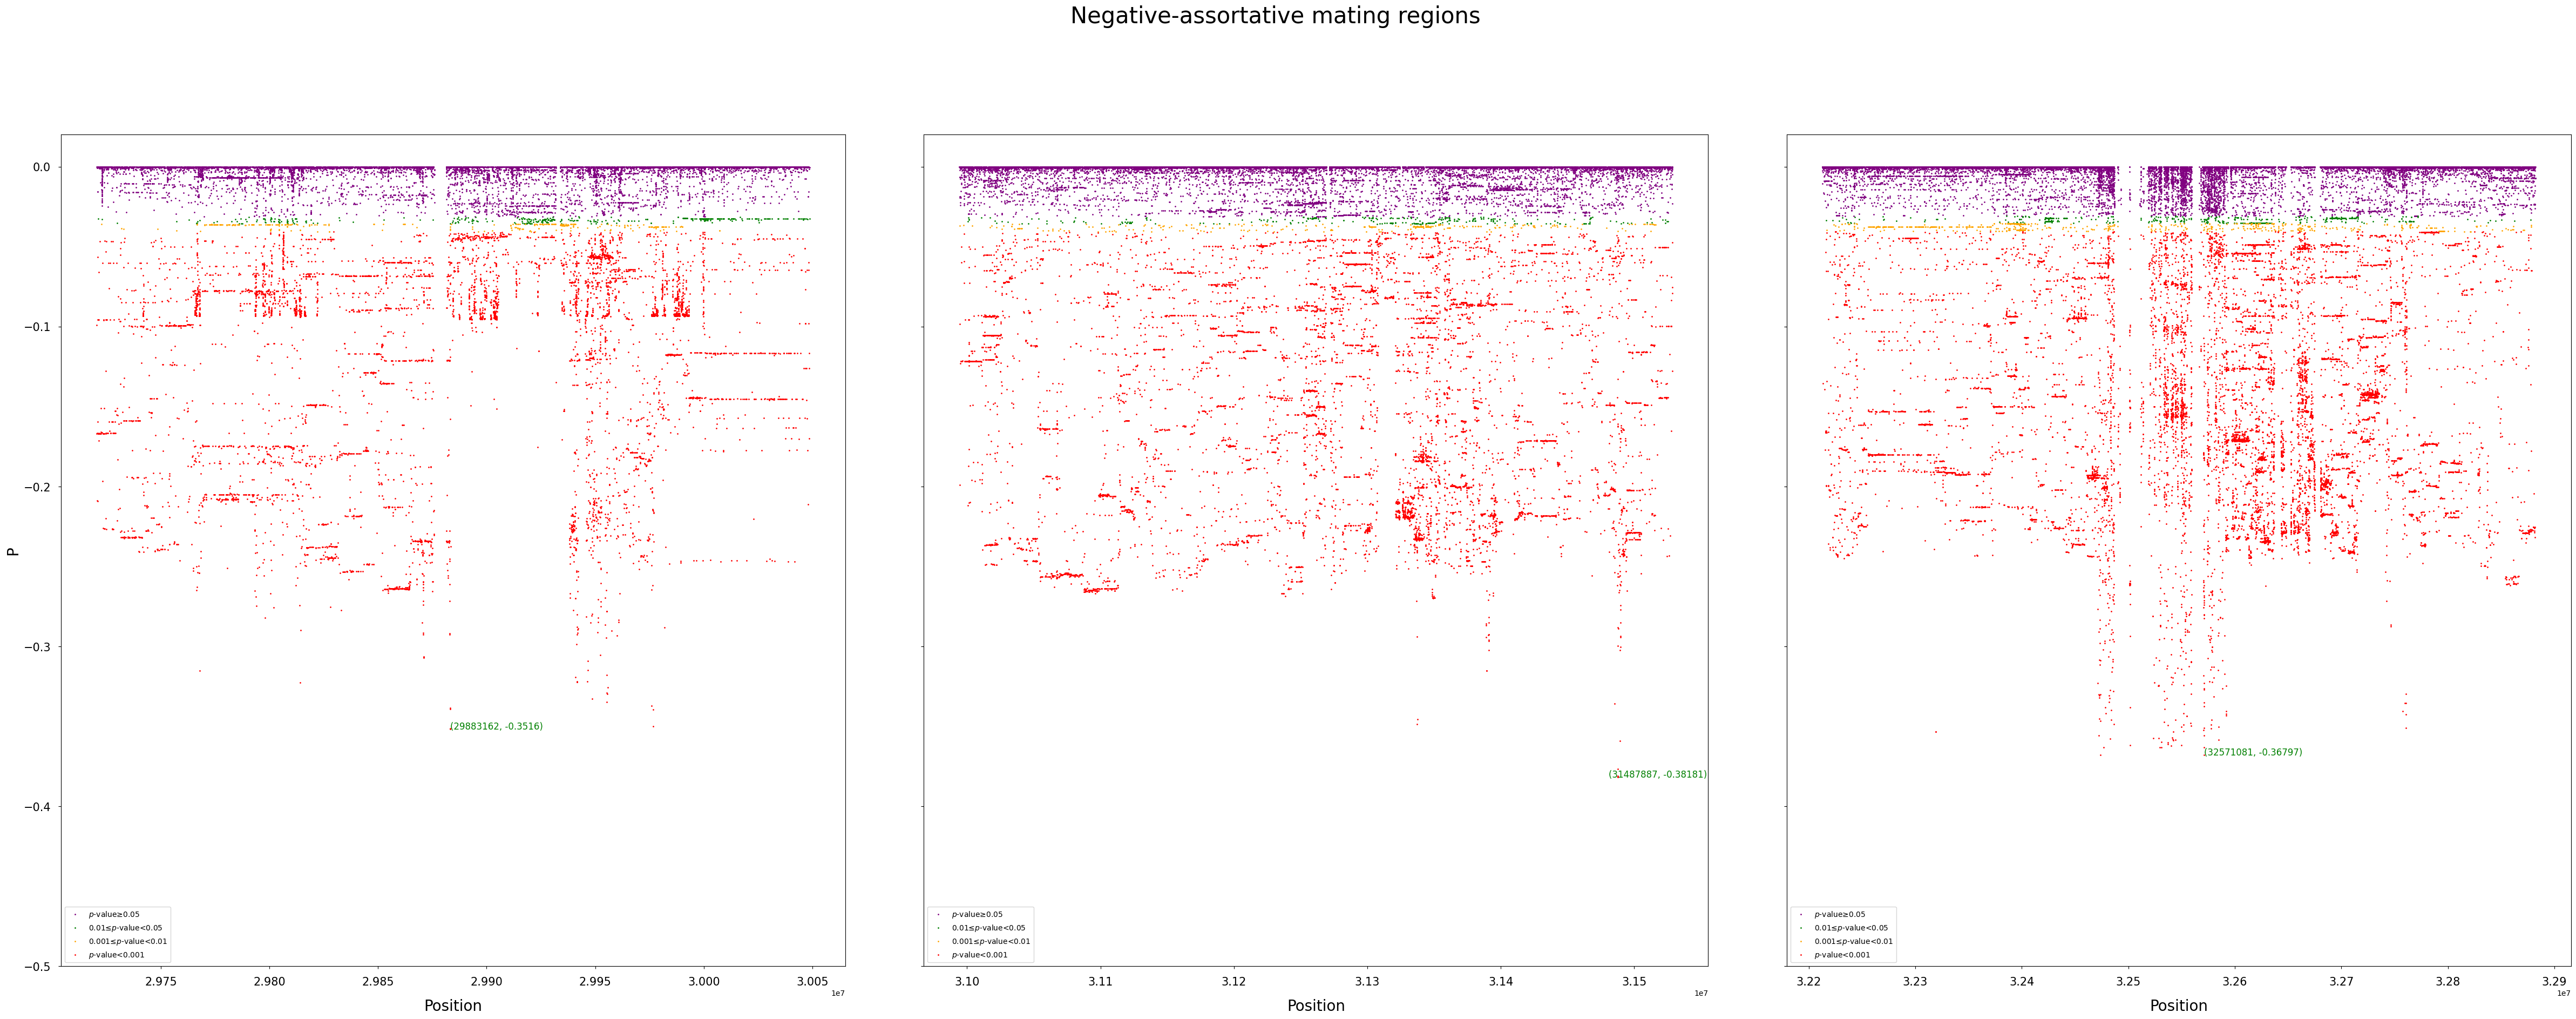

In [24]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(60, 20))


axes[0].scatter(less_95_xs, less_95_ys, color="purple", s=1, label="$\mathit{p}$-value≥0.05")
axes[0].scatter(from_95_to_99_xs, from_95_to_99_ys, color="green", s=1, label="0.01≤$\mathit{p}$-value<0.05")
axes[0].scatter(from_99_to_999_xs, from_99_to_999_ys, color="orange", s=1, label="0.001≤$\mathit{p}$-value<0.01")
axes[0].scatter(larger_than_999_xs, larger_than_999_ys, color="red", s=1, label="$\mathit{p}$-value<0.001")
axes[0].legend(loc="best")


index2 = getmaxindices(Ps1, 1)[0]
x_max_pos = positions1[index2]
y_max = Ps1[index2]
y_max = float(format(y_max, '.5f'))
axes[0].text(x_max_pos, y_max, (x_max_pos, y_max), color='green', fontsize=12)

axes[1].scatter(less_95_xs_mhc2, less_95_ys_mhc2, color="purple", s=1,label="$\mathit{p}$-value≥0.05")
axes[1].scatter(from_95_to_99_xs_mhc2, from_95_to_99_ys_mhc2, color="green", s=1,label="0.01≤$\mathit{p}$-value<0.05")
axes[1].scatter(from_99_to_999_xs_mhc2, from_99_to_999_ys_mhc2, color="orange", s=1,label="0.001≤$\mathit{p}$-value<0.01")
axes[1].scatter(larger_than_999_xs_mhc2, larger_than_999_ys_mhc2, color="red", s=1,label="$\mathit{p}$-value<0.001")
axes[1].legend( loc="best")


index2 = getmaxindices(Ps2, 1)[0]
x_max_pos = positions2[index2]
y_max = Ps2[index2]
y_max = float(format(y_max, '.5f'))
axes[1].text(x_max_pos-7000, y_max, (x_max_pos, y_max), color='green', fontsize=12)


axes[2].scatter(less_95_xs_mhc3, less_95_ys_mhc3, color="purple", s=1,label="$\mathit{p}$-value≥0.05")
axes[2].scatter(from_95_to_99_xs_mhc3, from_95_to_99_ys_mhc3, color="green", s=1,label="0.01≤$\mathit{p}$-value<0.05")
axes[2].scatter(from_99_to_999_xs_mhc3, from_99_to_999_ys_mhc3, color="orange", s=1,label="0.001≤$\mathit{p}$-value<0.01")
axes[2].scatter(larger_than_999_xs_mhc3, larger_than_999_ys_mhc3, color="red", s=1,label="$\mathit{p}$-value<0.001")
axes[2].legend( loc="best")


index3 = getmaxindices(Ps3, 1)[0]
x_max_pos = positions3[index3]
y_max = Ps3[index3]
y_max = float(format(y_max, '.5f'))
axes[2].text(x_max_pos, y_max, (x_max_pos, y_max), color='green', fontsize=12)



max_y = 0.02
axes[0].set_ylim(-0.5, max_y)
# yticks = np.linspace(-0.25, max_y, num=5)
# axes[0].set_yticks(yticks)


for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=15, pad=10)


axes[0].set_xlabel('Position', fontsize=20, labelpad=15)
axes[0].set_ylabel('P', fontsize=20)
axes[1].set_xlabel('Position', fontsize=20, labelpad=15)
axes[2].set_xlabel('Position', fontsize=20, labelpad=15)

fig.suptitle('Negative-assortative mating regions', fontsize=30, y=1)


plt.subplots_adjust(wspace=0.1, hspace=0.3)
#plt.savefig("../Figures/pic1_0611_mhc.png",dpi=300)
plt.savefig("pic1_0627.png",dpi=300)
plt.savefig("pic1_sim.pdf")
plt.show()
